# Assignment #2 - Classification

<font color="red"> <b> Due: Oct 23 (Friday) 11:00 pm </b> </font>

<font color="blue"> Akshay Patil </font>

# I. Introduction

Most of the supervised statistical learning problems fall into one of two categories: Regression or Classification. To simplify further, we We tend to refer to problems with a quantitative response as regression problems, while those involving a qualitative response are often referred to as classification problems. In this notebook we will be analysing a dataset using classification models.

The objective of the assignment is to build four different classification models and compare the efficiency of the models based on certain performance metrics.

_*Following models will be used for our analysis:*_

- Pocket Algorithm
- Linear Discriminant Analysis (LDA)
- Quadratic Discriminant Analysis (QDA)
- Logistic Regression

_Models will be compared based on following performance metrics:_

- Confusion matrix
- Precision
- Recall
- ROC
- AUC

# II. Data

##  Bank Loan Status Dataset

The data is obtained from kaggle website. The link for the data set is: https://www.kaggle.com/zaurbegiev/my-dataset  The dataset contains following features: Current Loan amount, Credit score, Annual Income, Years in current Job, Monthly debt and many more. There are total 19 features in the dataset. The data set contains more than 100,000 instances but mostly filled with null values and duplicate values.

# Reading the data
The data set is csv file. It is uploaded using pandas module. The data set contains more than 100,000 instances and 19 features in total. This data set contains Loan status as one of the feature which we will be predicting given new instance.

In [2]:
#Importing modules 
import numpy as np
import pandas as pd
df = pd.read_csv('credit_train.csv')
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Pre Processing of the data.
As we can see there are NaN values present. There are also duplicate values present. So we delete those instances, and we are left with almost 30,000 instances

In [3]:
#Dropping Na values
df = df.dropna()

# Checking for duplicates in Loan ID number and dropping the duplicates

df = df.drop_duplicates(subset = ["Loan ID"])
df.shape

(29490, 19)

On further observation it can be noticed that there are almost 2000 credit scores which are above 850 which is not possible. Upon closer look we can see they are multiplied by 10 , so we divide those particular scores by 10 and replace them in the model

In [4]:
(df['Credit Score']> 850).value_counts()
#  False    100514
#  Name: Credit Score, dtype: int64

df['Credit Score'] = df['Credit Score'].apply( lambda score: 
                                              (score/10) if score > 850 else score)

As there are lot of instances we will be considering only Long term loans for this model.
The string values in 'Loan status', 'Number of years worked' and others were replaced with their appropriate numerical counterpart. Loan ID and Customer ID are dropped from the model as they are no longer needed.

In this project we will be considering Loans classified as Long Term, so we will be left with around 8000 data set

In [5]:
df = df[df['Term'].str.contains("Long Term")]
df.shape

(7923, 19)

We drop the LoanID, customer ID and Term colums as they are no longer relevant for our analysis, Other Variables were also dropped, after checking their correlation with Loan status. Some variables like Tax liens and Bankruptcies had more than 90% instance values as 0 so those were also dropped.

In [6]:
df = df.drop(columns = ['Loan ID', 'Customer ID','Term', "Purpose", "Bankruptcies", "Tax Liens", 
                        "Months since last delinquent", 'Years in current job', "Monthly Debt",
                        "Number of Open Accounts", "Number of Credit Problems" ])

In [7]:
#Now we replace the strings in particular columns with their numerical counterpart"

df['Loan Status'] = df['Loan Status'].replace({'Charged Off':-1, 'Fully Paid':1})

df['Home Ownership'] = df['Home Ownership'].replace(
    {'Home Mortgage':1, 
     'Rent':2,
    'Own Home':3,
    'HaveMortgage':4,
})
df.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Home Ownership,Years of Credit History,Current Credit Balance,Maximum Open Credit
17,1,666204.0,723.0,1821967.0,1,22.0,813694.0,2004618.0
20,-1,317108.0,687.0,1133274.0,2,17.4,60287.0,126940.0
25,1,465410.0,688.0,1722654.0,2,22.3,107559.0,488356.0
40,-1,688468.0,682.0,1494616.0,2,16.6,343995.0,843854.0
44,1,311762.0,680.0,2211657.0,1,14.5,213921.0,509652.0


We shift our target columns that is Loan Status at the end. 

In [8]:
df = df[['Current Loan Amount', 'Credit Score', 'Annual Income',
         'Home Ownership','Years of Credit History','Current Credit Balance', 
         'Maximum Open Credit', 'Loan Status']]
df.head()

,Current Loan Amount,Credit Score,Annual Income,Home Ownership,Years of Credit History,Current Credit Balance,Maximum Open Credit,Loan Status
17,666204.0,723.0,1821967.0,1,22.0,813694.0,2004618.0,1
20,317108.0,687.0,1133274.0,2,17.4,60287.0,126940.0,-1
25,465410.0,688.0,1722654.0,2,22.3,107559.0,488356.0,1
40,688468.0,682.0,1494616.0,2,16.6,343995.0,843854.0,-1
44,311762.0,680.0,2211657.0,1,14.5,213921.0,509652.0,1


# Data Visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
groupName = []                                    
count = []
for group_name, subset in df.groupby('Home Ownership'):
    groupName.append(group_name)
    count.append(len(subset))
print(groupName)
print(count)

[1, 2, 3, 4]
[4709, 2532, 677, 5]


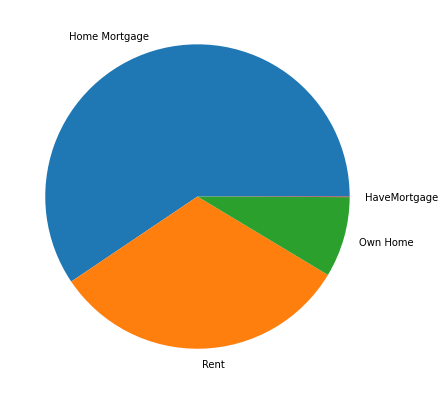

In [11]:
plt.figure(figsize = (7, 7))
plt.pie(count, labels = ("Home Mortgage","Rent","Own Home","HaveMortgage"))
plt.show()

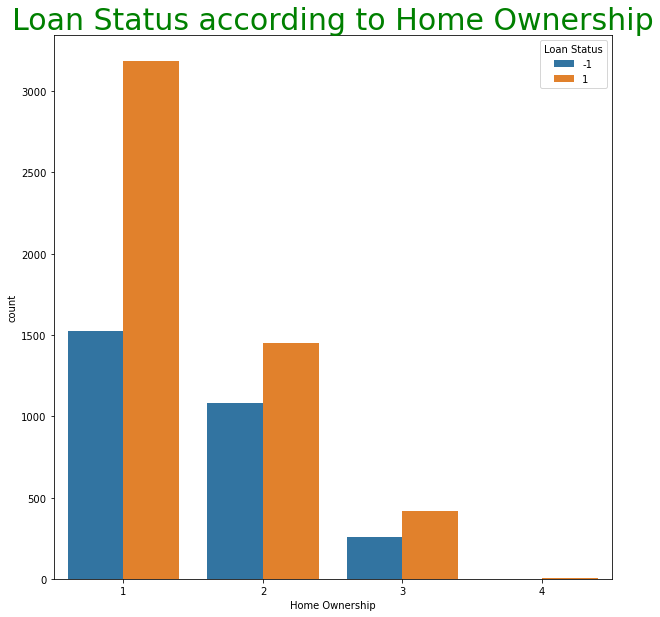

In [12]:
fig = plt.subplots(figsize=(10,10))
sns.countplot(df['Home Ownership'],hue=df['Loan Status'])
plt.title("Loan Status according to Home Ownership", color = 'green', fontsize = 30)
plt.show()

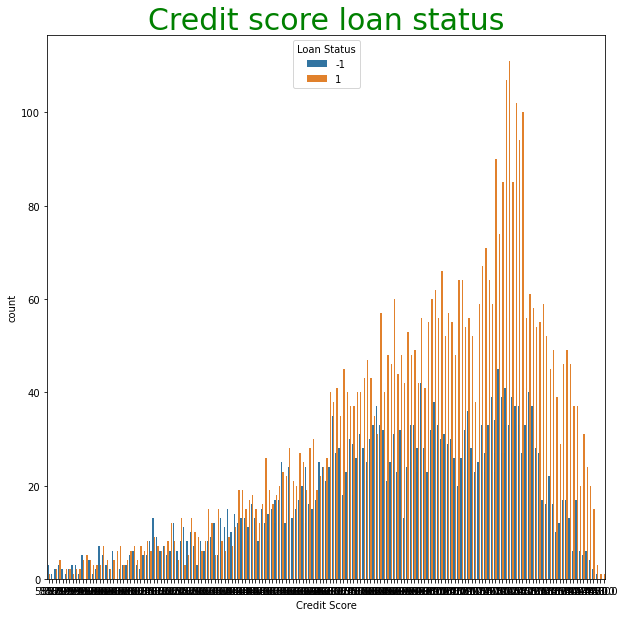

In [13]:
fig = plt.subplots(figsize=(10,10))
sns.countplot(df['Credit Score'],hue=df['Loan Status'])
plt.title("Credit score loan status", color = 'green', fontsize = 30)
plt.show()

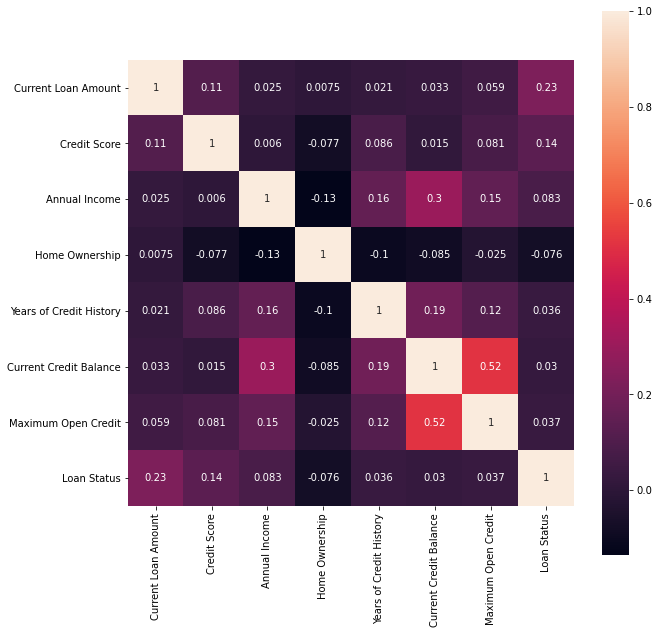

In [14]:
f = plt.subplots(figsize=(10, 10))
corr = df.corr()
sns.heatmap(data=corr, square=True, annot=True,cbar=True)
plt.show()

# Preliminary Observation

Visualization of data has been performed above and the following are the observations that we can observe from the visualizations performed above

- There are large number of people who have home mortgage compared to other people in the dataset. Followed by Rent , and then who own home and there are only 5 who have mortgage.

- According to Home ownership and loan status plot, we can see people who have home mortgage are more likely to repay their loans followed by those who stay on rent.

- The credit score loan status plot suggest that people having high credit score are more likely to repay their loans.

- The heat map shows the degree of correlation that exists between the different feature variables present in the dataset where current loan amount and credit history is relatively highly correlated to loan status as compared to other variables.

# III. Method

## Summary of Classification models

### 1.Pocket Algorithm
It is a refinement of the perceptron algorithm. Perceptron too can be used for classification but pocket has some advantages over it. In the Pocket Algorithm it repeatedly executes the perceptron algorithm and maintains in the pocket the weight vector which is remained unchanged for the highest number of iterations.


### 2.LDA
The word linear in the classifier’s name stems from the fact that the discriminant functions are linear functions of x. LDA assumes that the observations within each class are drawn from a multivariate Gaussian distribution with a class specific mean vector and a covariance matrix that is common to all K classes


### 3.QDA
Quadratic discriminant analysis (QDA) provides an alternative approach. Like LDA, the QDA classifier results from assuming that the observations from each class are drawn from a Gaussian distribution, and plugging estimates for the parameters into Bayes’ theorem in order to perform prediction. However, unlike LDA, QDA assumes that each class has its own covariance matrix.


### 4.Logistic Regression
It is one of the most popular model for classifcation. It makes use of a sigmoid function, which for given set of inputs , gives out a value between 0 to 1. Then with appropriate threshold value one can classify the prediction in two classes.


## Explanation of codes (algorithm)

### 1. Classifier
Classifier is the parent class which is used for all the classification model. The initialization has two variable mean and standard deviation. 
- Normalize method has the normalization formula which is used to normalize the data.
- Check Matrix just check the shape of the matrix which is passed. If it is not 2 dimensional then just pass an error.
- Train and Use are the abstract methods which are overridden in the child classes.


### 2. Pocket Algorithm
Pocket algorithm as the name suggest has a pocket (variable w) to store best weight. The Pocket algorithm also consists of the apha which is the learning rate. The Pocket algorithm has two methods Train and Use explained as follows
- Train method is used to calculate the weights. In this weight is calculated at every iteration of input samples and the weight is saved which is passed to compare method so that the best weight can be saved and used for next iteration. The best weight is kept in w_pocket.
- Use method is performed after the train method is performed as w_pocket is calcuated in train method. In the use method we are actually calcuating the dot product of w_pocket and the input data.


### 3. LDA
This class inherits the classifier base class overiding the normalize method and inheriting the train and use method which are explained as follows
- Normalize:This method takes the input and calculates its respective mean and standard deviation which are then used to normalize the input by subtracting the input from mean and dividing it by the standard deviation.
- Train:This method takes the input and calculates the mu by calculating its mean and then returns mu.
- Use:This method calculates the inverse of Sigma and then the result has been calculated as we can see in the code.


### 2. QDA
This class inherits the classifier base class overiding the normalize method and inheriting the train and use method which are explained as follows
- Normalize:This method takes the input and calculates its respective mean and standard deviation which are then used to normalize the input by subtracting the input from mean and dividing it by the standard deviation.
- Train:This method takes the input and calculates the mu by calculating its mean and Sigma by calcualting its covariance and then returns mu and sigma.
- Use:This method calculates the inverse of Sigma and calculates the difference between the sample and the mean which is mu and then the result has been calculated as we can see in the code.


### 4. Logistic Regression
This class inherits the classifier base class inheriting the train and use method which have been explained. This class also has softmax and g method as helper methods.
- Train:This method updates the weights iteratively after calculating the derivative of the softmax transformation.For calculating the softmax function, it uses the function softmax and uses the function g for calculating the dot product of the weight matrix and input matrix.
- Use:This method calculates the dot product of the input samples and the weight matrix to give the output.his output is provided by using the g function which is calculating the dot product of the current weight matrix and input matrix.

### A. Super Classs Definition

We first define the super class for classification algorithms. You only need to complete the normalize() method. You don't need to modify anything else. 

In [15]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        standardizedX = (X -self.meanX)/ self.stdX
        return standardizedX

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

For the rest of implementation, inherit the class and make your own Pocket, QDA, LDA, and LogisticRegress classes. Each following subsection will have toy tests as we did in the note before applying to your data.

### B. Pocket Algorithm


In [16]:
def normalize(X):
    return (X/X.max())

In [17]:
df1 = df.copy(deep = True)

In [18]:
df1['Current Loan Amount'] = normalize(df1["Current Loan Amount"])
df1['Credit Score'] = normalize(df1["Credit Score"])
df1['Annual Income'] = normalize(df1["Annual Income"])
df1['Years of Credit History'] = normalize(df1["Years of Credit History"])

In [21]:
X = df1[['Current Loan Amount', 'Credit Score' ]].copy()
T = df1[["Loan Status"]].copy()

In [22]:
#Splitting Dataset into Training and Testing Data
data = df1.sample(7923)
training_data = data.iloc[:6340,:]
testing_data = data.iloc[6340:7923,:]

End of training:  99


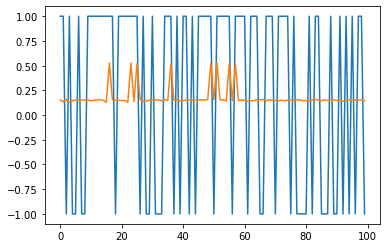

In [23]:
maxiter = 100
alpha = 0.1

X = training_data[['Current Loan Amount', 'Credit Score']].values
X = X[:500]
N = X.shape[0]
T = training_data[["Loan Status"]].values
T = T[:500]

X_Test = testing_data[['Current Loan Amount', 'Credit Score']].values

T_Test = testing_data[["Loan Status"]].values


X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1))))


w = np.zeros(3) 

plt.plot(T[:100])
for i in range(maxiter):
    
    converged = True
    for k in range(N):
        y = w @ X1[k]
        if np.sign(y) != np.sign(T[k]):
            w += alpha * T[k] * X1[k]
            converged = False
    
    if converged:
        print("converged at ", i)
        break

print("End of training: ", i)
Y = X1@w
plt.plot(Y[:100])


### Pocket Algorithm
### Pocket Class

In [24]:
from copy import deepcopy as copy 

class PocketAlgorithm(Classifier): 
    
    def __init__(self,alpha):
        Classifier.__init__(self)
        self.alpha = alpha
        self.w_pocket = None
       
 # train PocketAlgorithm model and store the best weights in w_pocket
    def train(self, X, T):
        
        def compare(X, T, w, wp):
            y = np.sign(X @ w)
            yp = np.sign(X @ wp)
            return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
        w = np.zeros(3)
        self.w_pocket = copy(w)
        maxiter = 100
        plt.plot(T[:100])
        for i in range(maxiter):
    
            converged = True
            for k in np.random.permutation(N): #range(N):
                    y = w @ X1[k]
                    if np.sign(y) != np.sign(T[k]):
                        w += self.alpha * T[k] * X1[k]
                        converged = False
                        ##### additional for pocket algorithm 
                    if compare(X1, T, w, self.w_pocket) > 0: 
                        self.w_pocket[:] = w[:]
    
            if converged:
                print("converged at ", i)
                break

        print("End of training: ", i)

   # apply the learned model to data X
    def use(self, X):
        Y1 = X1@self.w_pocket
        plt.plot(Y1[:100])
        return Y1

End of training:  99


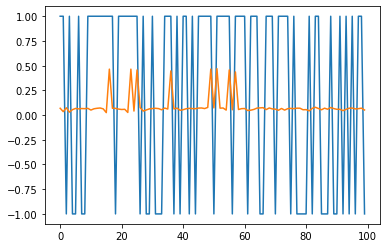

In [25]:
P = PocketAlgorithm(0.1)
P.train(X[:500],T[:500])
Y = P.use(X_Test[:500])

In [26]:
abcd = Y

### Performance Metrics

In [27]:
def confusion_matrix(Y, T):
    """
        Y    ndarray
             predicted labels
        T    ndarray
             target labels
             
        @cfm DataFrame
             confusion matrix
    """
    
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return cfm

In [28]:
T=T.flatten()
confusion_matrix(np.sign(Y),np.sign(T))


,-1,1
-1,0,0
1,192,308


In [31]:
from sklearn.metrics import precision_score, recall_score,f1_score,roc_curve
Y = np.where(Y > 0,1,-1)
print("Precision: {:.2f}%".format(100 * precision_score(T_Test[:500],Y)))
print("Recall: {:.2f}%".format(100 * recall_score(T_Test[:500],Y)))
print("F1 score: {:.2f}%".format(100 * f1_score(T_Test[:500],Y)))


Precision: 61.60%
Recall: 100.00%
F1 score: 76.24%


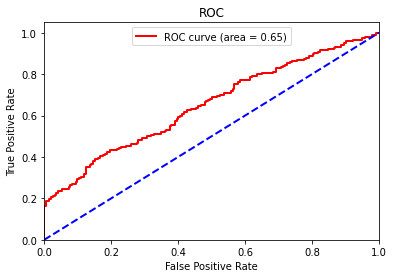

In [32]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(T, abcd)

roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="upper center")
plt.title('ROC')
plt.show()

### C. QDA

### Preparing data for QDA

In [33]:
df2 = df[['Current Loan Amount', 'Credit Score', 'Loan Status']]
df2.head()

,Current Loan Amount,Credit Score,Loan Status
17,666204.0,723.0,1
20,317108.0,687.0,-1
25,465410.0,688.0,1
40,688468.0,682.0,-1
44,311762.0,680.0,1


In [34]:
df2 = df2.sample(7923)

In [35]:
df2_train = df2[:6340]
df2_test = df2[6340:7861]

In [36]:
T_Test = df2_test.drop(columns =['Current Loan Amount', 'Credit Score'])

In [37]:
T_Test.head()

,Loan Status
77327,-1
46602,1
28896,1
88342,1
75527,1


In [38]:
df2_test.head()

,Current Loan Amount,Credit Score,Loan Status
77327,346126.0,675.0,-1
46602,617782.0,688.0,1
28896,336974.0,721.0,1
88342,432344.0,702.0,1
75527,268664.0,734.0,1


In [39]:
df2_test = df2_test.drop(columns =['Loan Status'])

In [40]:
df2_test.head()

,Current Loan Amount,Credit Score
77327,346126.0,675.0
46602,617782.0,688.0
28896,336974.0,721.0
88342,432344.0,702.0
75527,268664.0,734.0


In [41]:
c1=df2_train[df2_train['Loan Status']>0]
c2=df2_train[df2_train['Loan Status']<0]

In [42]:
C1 = c1[['Current Loan Amount', 'Credit Score']]
C1.head()

,Current Loan Amount,Credit Score
77027,418000.0,697.0
6056,397144.0,706.0
20682,387992.0,743.0
34707,178354.0,705.0
15463,606628.0,649.0


In [43]:
N1 = len(C1)
N1

4053

In [45]:
C2 = c2[['Current Loan Amount', 'Credit Score']]
C2.tail()

,Current Loan Amount,Credit Score
95452,311564.0,708.0
10171,631928.0,695.0
77967,264506.0,659.0
15875,563420.0,712.0
95347,400246.0,655.0


In [46]:
N2 = len(C2)
N2

2287

In [47]:
X = np.vstack((C1, C2))
N=N1+N2

### QDA Class

In [48]:
from copy import deepcopy as copy 

class QDA_Algorithm(Classifier): 
    
    def __init__(self):
        Classifier.__init__(self)

    def normalize(self,X):
        means,stds = np.mean(X, 0),np.std(X, 0)
        Xs = (X - means) / stds
        return Xs

    def train(self,X,S,E):
        mu = np.mean(X[S:E], 0)
        Sigma = np.cov(X[S:E].T)
        return mu,Sigma

    def use(self,X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = X - mu
        return -0.5  * np.log(np.linalg.det(sigma)) \
            - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
            + np.log(prior)

### Object of class QDA

In [49]:
q = QDA_Algorithm()

### Normalizing the data

In [50]:
Xs = q.normalize(X)

### Training the data

In [51]:
mu1,Sigma1 = q.train(Xs,0,N1)
mu2,Sigma2 = q.train(Xs,N1,N)

prior1 = N1 / N
prior2 = N2 / N

### Testing and Visualizing

In [52]:
xs, ys = np.meshgrid(np.linspace(-3,7,39), np.linspace(-3,7,39))
#df2_test = np.vstack((xs.flat, ys.flat)).T
XtestS = q.normalize(df2_test.values)
d1 = q.use(XtestS, mu1, Sigma1, prior1)
d2 = q.use(XtestS, mu2, Sigma2, prior2)

Text(0.5, 0, 'QDA P(x|Class=k)\n from disc funcs')

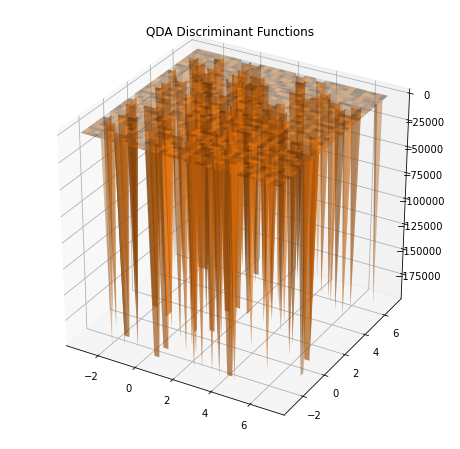

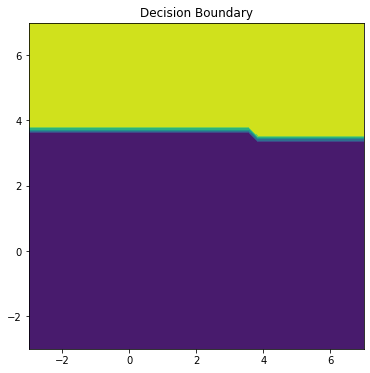

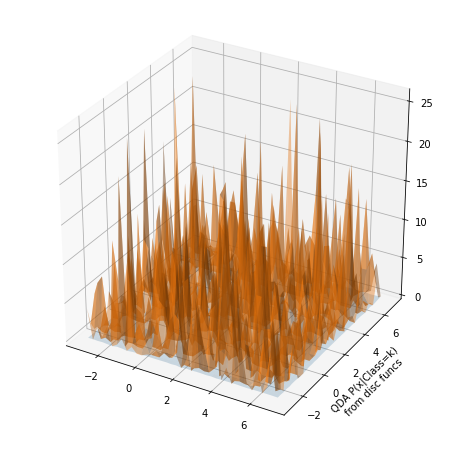

In [53]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, d1.reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, d2.reshape(xs.shape), alpha=0.4)
plt.title("QDA Discriminant Functions")

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, np.sort((d1-d2 > 0),0).reshape(xs.shape))
plt.title("Decision Boundary")
#plt.plot(C1[:], 'or')
#plt.plot(C2[:],'xb')

# Plot generative distributions  p(x | Class=k)  starting with discriminant functions

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

prob1 = np.exp( d1.reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(prior1))
prob2 = np.exp( d2.reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(prior2))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)


plt.ylabel("QDA P(x|Class=k)\n from disc funcs", multialignment="center")

In [54]:
D = []
D.append(d1)
D.append(d2)

D = np.argmax(D,axis=0)

for i in range(len(D)):
    if D[i] == 0:
        D[i] = -1

### Performance metrics

In [55]:
from sklearn.metrics import precision_score, recall_score,f1_score,roc_auc_score
print("Precision: {:.2f}%".format(100 * precision_score(T_Test,D,average='micro')))
print("Recall: {:.2f}%".format(100 * recall_score(T_Test,D,average='micro')))
print("F1 score: {:.2f}%".format(100 * f1_score(T_Test,D,average='micro')))

Precision: 51.15%
Recall: 51.15%
F1 score: 51.15%


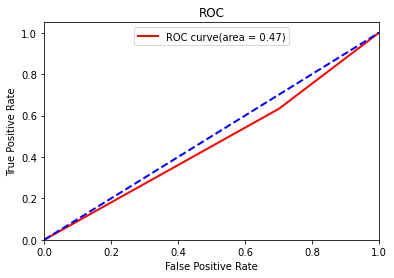

In [56]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(T_Test, D)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',lw=lw, label='ROC curve(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="upper center")
plt.show()


In [57]:
confusion_matrix(np.sign(D),np.sign(T_Test.values).flatten())

,-1,1
-1,165,355
1,388,613


### D. LDA

In [58]:
Xtrain = np.vstack((C1, C2))
N=N1+N2

### LDA Class

In [59]:
from copy import deepcopy as copy 

class LDA_Algorithm(Classifier): 
    
    def __init__(self):
        Classifier.__init__(self)

    def normalize(self,X):
        means,stds = np.mean(X, 0),np.std(X, 0)
        Xs = (X - means) / stds
        return Xs

    def train(self,X,S,E):
        mu = np.mean(X[S:E], 0)
        return mu

    def use(self,X,mu,sigma,prior):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum(np.dot(X, sigma_inv) * mu \
                - 0.5 * np.dot(mu, sigma_inv) * mu \
                + np.log(prior), axis=1)

### Making an object for LDA Class

In [60]:
l = LDA_Algorithm()

### Normalizing the data

In [61]:
Xs = l.normalize(Xtrain)

### Training the data

In [62]:
mu1 = l.train(Xs,0,N1)
mu2 = l.train(Xs,N1,N)

Sigma = np.cov(Xs.T)
prior1 = N1 / N
prior2 = N2 / N

In [63]:
## now compute the discriminant function on test data
xs, ys = np.meshgrid(np.linspace(-3,7, 39), np.linspace(-3,7, 39))
Xtest = np.vstack((xs.flat, ys.flat)).T
XtestS = l.normalize(df2_test.values)
d1 = l.use(XtestS, mu1, Sigma, prior1)
d2 = l.use(XtestS, mu2, Sigma, prior2)

### Testing and visualizing

Text(0.5, 1.0, 'Decision Boundary')

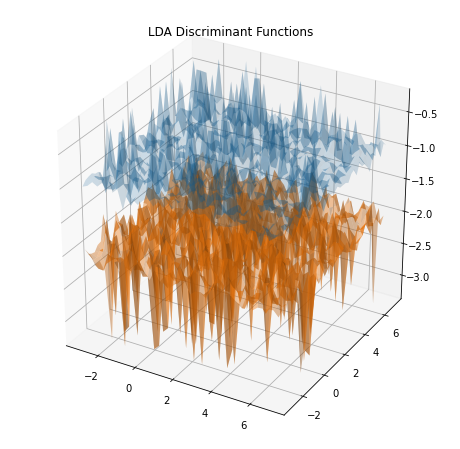

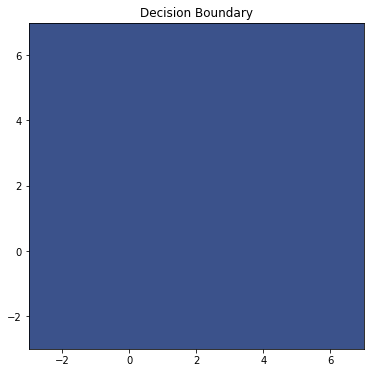

In [64]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, d1.reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, d2.reshape(xs.shape), alpha=0.4)
plt.title("LDA Discriminant Functions")

plt.figure(figsize=(6,6))
plt.contourf(xs, ys,np.sort((d1-d2 > 0),0).reshape(xs.shape))
plt.title("Decision Boundary")

### Performance Metrics

In [65]:
D2 = []
D2.append(d1)
D2.append(d2)
#print(len(D))
D2 = np.argmax(D2,axis=0)
#print(D)
for i in range(len(D2)):
    if D2[i] == 0:
        D2[i] = -1

In [66]:
from sklearn.metrics import precision_score, recall_score,f1_score,roc_auc_score
print("Precision: {:.2f}%".format(100 * precision_score(T_Test,D2,average='micro')))
print("Recall: {:.2f}%".format(100 * recall_score(T_Test,D2,average='micro')))
print("F1 score: {:.2f}%".format(100 * f1_score(T_Test,D2,average='micro')))

Precision: 36.36%
Recall: 36.36%
F1 score: 36.36%


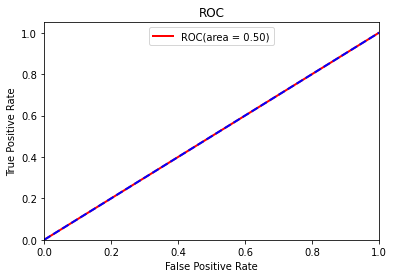

In [67]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(T_Test, D2)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
#print(fpr,tpr)
plt.plot(fpr, tpr, color='red',lw=lw, label='ROC(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="upper center")
plt.show()

In [68]:
confusion_matrix(np.sign(D2),np.sign(T_Test.values).flatten())

,-1,1
-1,553,968
1,0,0


### E. Logistic Regression

In [162]:
from copy import deepcopy as copy
class LogisticRegression(Classifier): 
    """ 
        Logistic Regression class 
        
        attributes
        ===========
        
    """
    def __init__(self,alpha):
        Classifier.__init__(self)
        self.w = None
        self.alpha = alpha
    
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    def g(self,X, w):
        return self.softmax(X @ w) 
        
    
    def train(self, X, T):
        X = self.normalize(X)
       
        N = X.shape[0]
        D = X.shape[1]
        K = len(np.unique(T))
        
        self.w = np.random.rand(D+1, K)

        niter = 10
        X = self.add_ones(X)
        
        T = self.add_ones(T.reshape(-1,1))
        
        for step in range(niter):
                ys = self.g(X,self.w)
                self.w += self.alpha * X.T @ (T - ys)                
    
    # apply the learned model to data X
    def use(self, X):
        Xs = (X - self.meanX)/self.stdX
        Xs = self.add_ones(Xs)
        return self.g(Xs, self.w)

In [163]:
X = df[['Current Loan Amount', 'Credit Score']].copy()
T = df[['Loan Status']].copy()

In [164]:
data = df.sample(7923)
training_data = data.iloc[:6340,:]
testing_data = data.iloc[6340:7923,:]

In [165]:
X_Train = training_data[['Current Loan Amount', 'Credit Score']].values

N = X.shape[0]
T_Train = training_data[["Loan Status"]].values


In [166]:
X_Test = testing_data[['Current Loan Amount', 'Credit Score']].values
T_Test = testing_data[["Loan Status"]].values

In [204]:
lr = LogisticRegression(0.0055)
lr.train(X_Train[:6340],T_Train[:6340])
Y = lr.use(X_Test[:1583])

Accuracy:  31.641187618445983 %


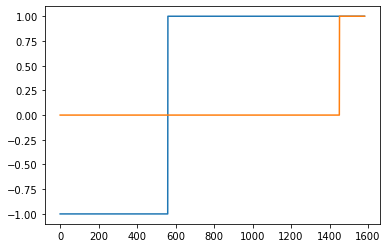

In [205]:
Yl = np.argmax(Y, 1)
Tl=np.where(T_Test==-1,0,1)

plt.plot(np.sort(T_Test,0))
plt.plot(np.sort(Yl,0))

print("Accuracy: ", 100 - np.mean(np.abs(Tl[:100] - Yl)) * 100, "%")

### Performance metrics

In [206]:
from sklearn.metrics import precision_score, recall_score,f1_score,roc_auc_score
print("Precision: {:.2f}%".format(100 * precision_score(T_Test,Yl,average='micro')))
print("Recall: {:.2f}%".format(100 * recall_score(T_Test,Yl,average='micro')))
print("F1 score: {:.2f}%".format(100 * f1_score(T_Test,Yl,average='micro')))

Precision: 8.28%
Recall: 8.28%
F1 score: 8.28%


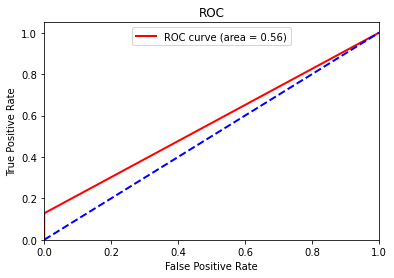

In [207]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(T_Test[:1583], Yl)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.legend(loc="upper center")
plt.show()

In [208]:
for i in range(len(Yl)):
    if Yl[i] == 0:
        Yl[i] = -1

In [209]:
confusion_matrix(np.sign(Yl),np.sign(T_Test).flatten())

,-1,1
-1,560,892
1,0,131
